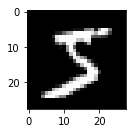

In [24]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [20]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [21]:
seed = 7
numpy.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [22]:
def BaselineError_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [23]:
model = BaselineError_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline_Model Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2783 - acc: 0.9210 - val_loss: 0.1415 - val_acc: 0.9573
Epoch 2/10
 - 6s - loss: 0.1115 - acc: 0.9675 - val_loss: 0.0923 - val_acc: 0.9711
Epoch 3/10
 - 6s - loss: 0.0718 - acc: 0.9798 - val_loss: 0.0787 - val_acc: 0.9769
Epoch 4/10
 - 6s - loss: 0.0503 - acc: 0.9857 - val_loss: 0.0747 - val_acc: 0.9767
Epoch 5/10
 - 6s - loss: 0.0374 - acc: 0.9893 - val_loss: 0.0674 - val_acc: 0.9794
Epoch 6/10
 - 6s - loss: 0.0270 - acc: 0.9927 - val_loss: 0.0629 - val_acc: 0.9808
Epoch 7/10
 - 6s - loss: 0.0210 - acc: 0.9950 - val_loss: 0.0623 - val_acc: 0.9811
Epoch 8/10
 - 6s - loss: 0.0143 - acc: 0.9966 - val_loss: 0.0623 - val_acc: 0.9805
Epoch 9/10
 - 6s - loss: 0.0109 - acc: 0.9979 - val_loss: 0.0582 - val_acc: 0.9814
Epoch 10/10
 - 6s - loss: 0.0080 - acc: 0.9986 - val_loss: 0.0573 - val_acc: 0.9821
Baseline Error: 1.79%
